<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Retail_Crypto_Universe_Return_by_Ticker_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

13:44:58 Starting...
13:44:58 Installing yfinance into Google notebook...
13:45:13 Installing arch into Google notebook...
13:45:27 Initialized.


In [37]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=list(map(lambda x:x.replace("-USD",""),data.columns.droplevel(1)))
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
display(data)

Return (%),AAVE,ADA,ARB,AVAX,BCH,BONK,BTC,COMP,DOGE,ETC,...,PNUT,POPCAT,SHIB,SOL,TRUMP,UNI,WIF,XLM,XRP,XTZ
UTC Date,,,,,,,,,,,,,,,,,,,,,
2024-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-08,NaN,NaN,NaN,NaN,NaN,NaN,1.448534,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09,NaN,NaN,NaN,NaN,NaN,NaN,2.348370,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.402624,NaN,0.477437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,2.013289,NaN,-0.655153,NaN,-1.226744,-1.542857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-19,6.443445,-2.295334,-0.762880,-3.389058,-3.282590,-4.154519,-0.764352,-4.829850,-3.724915,-0.944054,...,-2.975321,-9.171970,-2.830503,-3.682969,-2.749390,-3.154751,-6.883488,-2.010943,-1.993209,-3.281587
2025-05-20,5.026192,0.477961,0.433240,1.575605,0.326137,1.571610,1.162133,-0.429612,0.733036,-0.567034,...,-5.438056,3.969475,0.137080,1.077644,11.987591,1.558737,-1.797992,0.319066,-0.983279,1.492341
2025-05-21,-4.474391,3.188849,4.410855,2.602982,3.388736,2.869978,2.660638,2.612542,3.573144,3.118154,...,8.790959,7.635080,1.608487,2.978716,-0.030026,3.208246,14.572789,1.976163,1.653572,1.787471


14:15:32 Wrote figure to 'Cumulative Return for Retail Cryptocurrency Sample.png'.


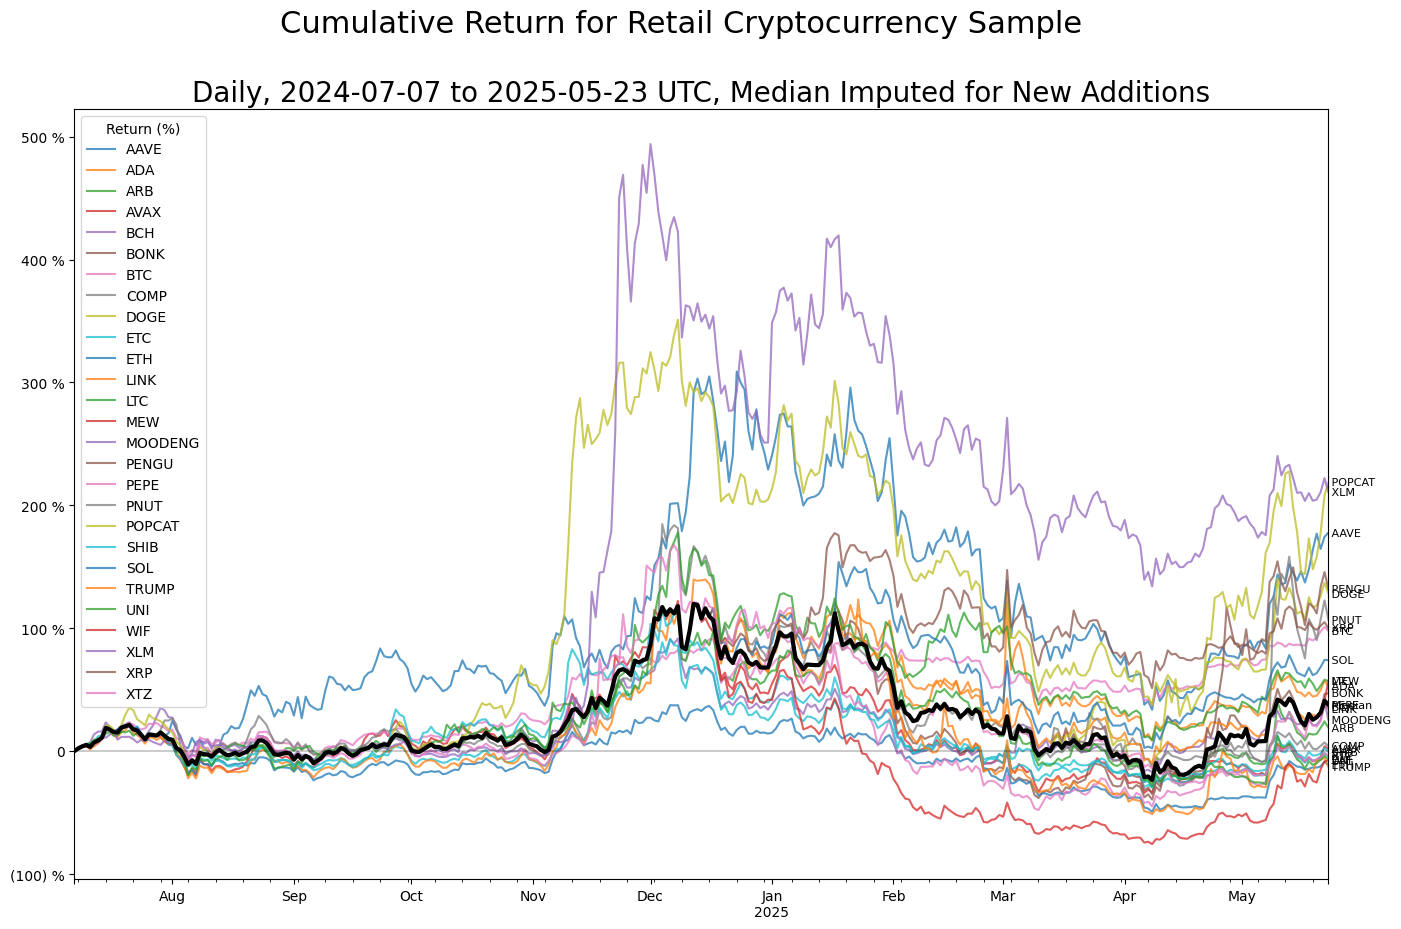

In [49]:
factor=(one+data/hundred)

for k,v in sorted(zip((s:=factor.apply(lambda x:x.first_valid_index()-1)).values,s.index),key=lambda x:x[0]):
    factor.loc[k,v]=m if not np.isnan(m:=factor.cumprod().loc[k].median()) else one

factor=factor.cumprod()*hundred-hundred
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
factor.plot(ax=plot,alpha=0.75)
factor['Median']=factor.median(axis=1)
factor['Median'].plot(ax=plot,color='black',linewidth=3)

plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Cumulative Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC, Median Imputed for New Additions" % (factor.index[0],factor.index[-1]),fontsize=20)

for c in factor:
    plot.text(x:=factor.index[-1],y:=factor.loc[x,c]," "+c,fontsize=8,ha='left',va='center')

figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

14:10:33 Excluding recently listed coins from analysis: MEW, MOODENG...
14:10:33 Rank Correlation for 'Useful' Coins: SignificanceResult(statistic=np.float64(-0.5529411764705882), pvalue=np.float64(0.026314499870666502))


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin
Return (%),,,,,,,,,,
AAVE,0.479099,0.799056,5.288506,71,0.627630,1.273133,0.202971,,1,0.0
ADA,0.105852,0.242314,4.173455,71,0.495298,0.489228,0.624680,,2,0.0
ARB,0.433240,0.406868,5.716622,71,0.678438,0.599713,0.548698,,3,0.0
AVAX,0.226491,0.523341,4.863370,71,0.577176,0.906727,0.364551,,4,0.0
BCH,0.159456,0.506627,4.090093,71,0.485405,1.043721,0.296614,,5,0.0
BTC,0.223019,0.458600,2.431798,71,0.288601,1.589044,0.112050,,7,0.0
COMP,-0.179553,0.207995,4.102173,71,0.486838,0.427237,0.669207,,8,0.0
ETC,-0.147294,0.158399,3.630024,71,0.430805,0.367681,0.713111,,10,0.0
ETH,-0.010264,0.564490,4.665382,71,0.553679,1.019527,0.307953,,11,0.0


14:10:33
OLS Regression for 'Useful' Coins
                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     7.034
Date:                Fri, 23 May 2025   Prob (F-statistic):             0.0189
Time:                        14:10:33   Log-Likelihood:                 5.7475
No. Observations:                  16   AIC:                            -7.495
Df Residuals:                      14   BIC:                            -5.950
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin,Linear Model
Return (%),,,,,,,,,,,
AAVE,0.479099,0.799056,5.288506,71,0.627630,1.273133,0.202971,,1,0.0,0.551307
ADA,0.105852,0.242314,4.173455,71,0.495298,0.489228,0.624680,,2,0.0,0.525328
ARB,0.433240,0.406868,5.716622,71,0.678438,0.599713,0.548698,,3,0.0,0.499350
AVAX,0.226491,0.523341,4.863370,71,0.577176,0.906727,0.364551,,4,0.0,0.473371
BCH,0.159456,0.506627,4.090093,71,0.485405,1.043721,0.296614,,5,0.0,0.447393
BONK,0.243902,1.423750,7.960960,71,0.944792,1.506945,0.131825,,6,1.0,NaN
BTC,0.223019,0.458600,2.431798,71,0.288601,1.589044,0.112050,,7,0.0,0.421414
COMP,-0.179553,0.207995,4.102173,71,0.486838,0.427237,0.669207,,8,0.0,0.395436
DOGE,0.022926,0.635525,5.244064,71,0.622356,1.021160,0.307179,,9,1.0,NaN


14:10:34 Wrote figure to 'Mean Return for Retail Cryptocurrency Sample.png'.


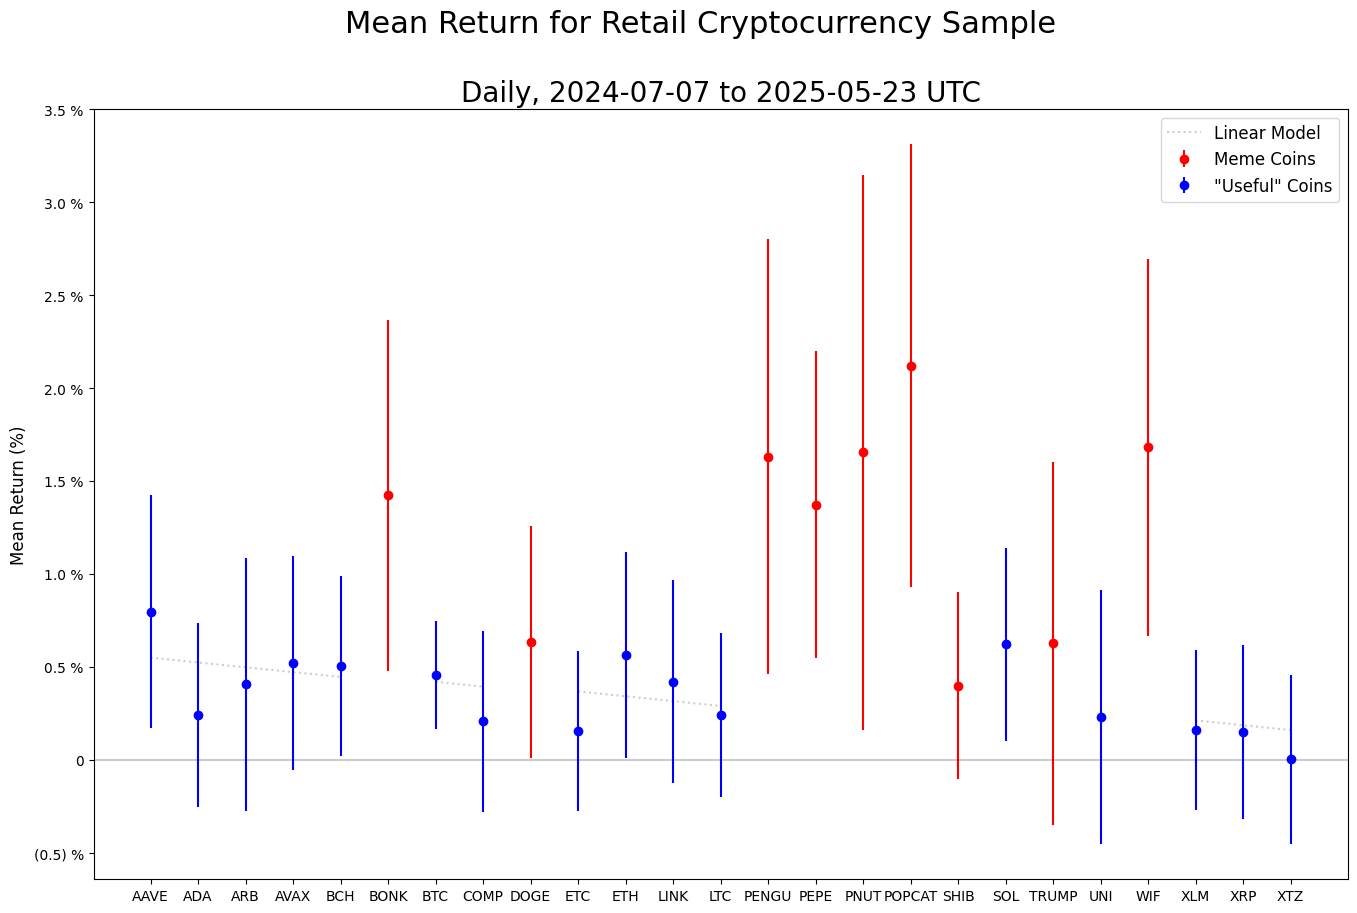

In [39]:
from scipy.stats import spearmanr,norm
from statsmodels.api import OLS
from statsmodels.tools import add_constant

nprint("Excluding recently listed coins from analysis: %s..." % ", ".join(c:=(data.index[-1]-data.apply(lambda x:x.first_valid_index(),axis=0)).apply(lambda x:np.nan if x.n>60 else x.n).dropna().index))

report=pd.DataFrame({ # drop recently listed coins and then drop na's, to ensure we have sufficient history for this analysis
    "Median":(design:=data.drop(columns=c).dropna(axis=0).sort_index()).median(), # sort index not needed, but let's do it anyway
    "Mean":(m:=design.mean()),
    "Std.Dev.":design.std(),
    "Sample":design.count(),
    "Std.Err.":(e:=design.std()/np.sqrt(design.count())),
    "t Statistic":(z:=m/e),
    "p Value":(p:=z.apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))),
    "Significance":p.apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else ""),
    "Symbol Rank":list(range(1,m.index.shape[0]+1)),
    "Meme Coin":[one if t in (meme_coins:="BONK,DOGE,PENGU,PEPE,PNUT,POPCAT,SHIB,TRUMP,WIF,MEW,MOODENG") else zero for t in m.index]
})

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=report.index,y:=report["Mean"],alpha=0,label=None)
plot.errorbar(x:=report[report["Meme Coin"]==one].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Red",label='Meme Coins')
plot.errorbar(x:=report[report["Meme Coin"]==zero].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Blue",label='"Useful" Coins')
nprint("Rank Correlation for 'Useful' Coins:",spearmanr(x,y))

design=report.loc[u:=x];display(design)
design["Symbol Rank"]=list(range(1,design.index.shape[0]+1))
fit=OLS(y:=design["Mean"],add_constant(x:=design["Symbol Rank"])).fit()
nprint("OLS Regression for 'Useful' Coins",fit.summary(),sep="\n")
report.loc[design.index,"Linear Model"]=fit.predict()
display(report)

plot.plot(x:=report.index,y:=report["Linear Model"],':',color='black',alpha=0.2,label="Linear Model")
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Mean Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (data[u].index[0],data[u].index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.set_ylabel("Mean Return (%)",fontsize=12)
plot.legend(fontsize=12)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

In [50]:
from warnings import catch_warnings,simplefilter

design=data[report[report["Meme Coin"]==zero].index].dropna()
results=pd.DataFrame(index=design.columns)
nprint("Fitting AR(1)-AGARCH(1,1) Model with GED Innovations for %s to %s UTC..." % (design.index[0],design.index[-1]))

for ticker in tqdm(design.columns):
    model=ARX(design[ticker],lags=[1])
    model.volatility = GARCH2(1,0,1)
    model.distribution = GeneralizedError2()

    with catch_warnings():
        simplefilter("ignore")
        ged_model=model.fit(update_freq=0,disp='Off',options={'maxiter':1000})

        if ged_model.convergence_flag==0:
            for field in "Estimate","Std.Err.":
                results.loc[ticker,"Drift,%s" % field]=(g:=ged_model.params if field=="Estimate" else ged_model.std_err)["Const"]
                results.loc[ticker,"Return,%s" % field]=g[ticker+"[1]"]
                results.loc[ticker,"C,%s" % field]=g["omega"]
                results.loc[ticker,"A,%s" % field]=g["alpha[1]"]
                results.loc[ticker,"B,%s" % field]=g["beta[1]"]
                results.loc[ticker,"nu,%s" % field]=g["nu"]

            results.loc[ticker,"variance,Estimate"]=results.loc[ticker,"C,Estimate"]/(one-results.loc[ticker,"B,Estimate"]-results.loc[ticker,"B,Estimate"])

results.columns=pd.MultiIndex.from_tuples(list(map(lambda x:tuple(x.split(",")),results.columns)))
spearman=pd.DataFrame(index=(lambda x:dict.fromkeys(x).keys())(results.columns.get_level_values(0)))
results.sort_index(axis=1,inplace=True)
display(results)

nprint("Analysis of correlation with ticker ranks...")

for estimator in spearman.index:
    spearman.loc[estimator,"Rank Correlation"]=(R:=spearmanr(x:=results.index,y:=results.xs("Estimate",axis=1,level=1)[estimator])).statistic
    spearman.loc[estimator,"Sample"]=(n:=len(x))
    spearman.loc[estimator,"t Statistic"]=R.statistic*((n-two)/(one-R.statistic**two))**half
    spearman.loc[estimator,"p Value"]=R.pvalue

spearman["Significance"]=spearman["p Value"].apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else "")
display(spearman.sort_values("Rank Correlation",ascending=False))

nprint("Most significant result",(p:=spearman["p Value"].min())," or larger found by chance with probability",one-(one-p)**(n:=spearman.shape[0]),"in a set of",n,"independent tests.")

14:27:07 Fitting AR(1)-AGARCH(1,1) Model with GED Innovations for 2025-03-05 to 2025-05-23 UTC...


  0%|          | 0/16 [00:00<?, ?it/s]

A                           B                        C  \
            Estimate      Std.Err.      Estimate      Std.Err.   Estimate   
Return (%)                                                                  
AAVE        0.003127  1.496629e-01  4.912074e-01  5.254669e+00  13.412970   
ADA         0.101578  1.293038e-01  6.475467e-01  1.813861e-01   4.707275   
ARB         0.117160  1.002689e-01  6.248452e-01  8.803574e-02   8.157778   
AVAX       -0.154612  1.527168e-09  1.114512e+00  1.036666e-08   1.583678   
BCH         0.051057  1.088548e-01  6.433182e-01  9.027679e-02   5.525639   
BTC        -0.118116  1.422597e-10  1.100811e+00  3.400805e-09   0.214690   
COMP        0.046662  8.690478e-02  7.433094e-01  1.058734e-01   3.608225   
ETC         0.106557  8.007521e-02  2.358727e-01  3.884719e-01   9.705515   
ETH         0.492859  5.332428e-01  2.208735e-14  6.084386e-01  16.553274   
LINK       -0.151369  4.710499e-09  1.104625e+00  2.787715e-12   1.473041   
LTC         0.047177  9.876457e-02  6.092143e-01  1.308219e-01   4.831938   
SOL         0.053101  1.028965e-01  8.126241e-01  1.393410e-01   2.544846   
UNI         0.191969  2.319205e-01  4.440421e-01  8.214188e-01  14.027937   
XLM         0.085132  1.089943e-01  5.439960e-01  1.038049e-01   5.058752   
XRP         0.183577  1.780343e-01  5.924313e-01  1.238423e-01   4.276986   
XTZ         0.070628  9.870707e-02  5.499643e-01  3.381216e-01   5.893111   

                             Drift              Return                  nu  \
                Std.Err.  Estimate  Std.Err.  Estimate  Std.Err.  Estimate   
Return (%)                                                                   
AAVE        1.467324e+02  0.063365  0.889593 -0.143981  0.109773  1.254103   
ADA         3.111582e+00 -0.280531  0.002072 -0.196578  0.001135  1.078056   
ARB         4.268038e+00  0.402864  0.000220  0.035060  0.000039  0.973846   
AVAX        5.302042e-08 -0.641040  0.002283  0.062046  0.000245  2.005389   
BCH         2.204011e+00  0.080162  0.000503 -0.099311  0.000314  1.062982   
BTC         5.986036e-05  0.100120  0.107620 -0.136134  0.107962  1.815007   
COMP        2.063624e+00 -0.190280  0.126881 -0.054710  0.169452  1.336002   
ETC         5.841364e+00 -0.304028  0.002910 -0.201245  0.001853  0.997599   
ETH         1.313178e+01  0.176426  0.000168 -0.283958  0.000610  0.613031   
LINK        3.283119e-04 -0.883369  0.003769 -0.085645  0.000319  2.075154   
LTC         2.498954e+00  0.032271  0.001774 -0.191031  0.002534  1.064796   
SOL         2.697068e+00  0.084596  0.006388 -0.064220  0.002665  1.134478   
UNI         2.642807e+01 -0.616573  0.000458 -0.164758  0.000157  0.689487   
XLM         2.425080e+00 -0.079304  0.464906 -0.112365  0.159748  1.426426   
XRP         2.642167e+00 -0.121634  0.009182  0.068520  0.010108  0.883905   
XTZ         5.734205e+00  0.315925  0.004270  0.001132  0.009267  1.094070   

                        variance  
            Std.Err.    Estimate  
Return (%)                        
AAVE        0.323304  762.738131  
ADA         0.205467  -15.951818  
ARB         0.211553  -32.671580  
AVAX        0.000032   -1.288564  
BCH         0.263998  -19.277527  
BTC         0.347903   -0.178667  
COMP        0.280365   -7.414892  
ETC         0.234767   18.372801  
ETH         0.151140   16.553274  
LINK        0.262267   -1.218145  
LTC         0.238806  -22.121373  
SOL         0.246996   -4.070138  
UNI         0.190659  125.343710  
XLM         0.277449  -57.491080  
XRP         0.241308  -23.136019  
XTZ         0.213893  -58.973216

14:27:09 Analysis of correlation with ticker ranks...


,Rank Correlation,Sample,t Statistic,p Value,Significance
A,0.329412,16.0,1.305405,0.212801,
Return,0.161765,16.0,0.613346,0.549483,
Drift,0.005882,16.0,0.022010,0.982751,
C,0.005882,16.0,0.022010,0.982751,
nu,-0.164706,16.0,-0.624806,0.542148,
B,-0.270588,16.0,-1.051681,0.310761,
variance,-0.347059,16.0,-1.384640,0.187834,


14:27:09 Most significant result 0.18783442010629964  or larger found by chance with probability 0.7669162165391432 in a set of 7 independent tests.
